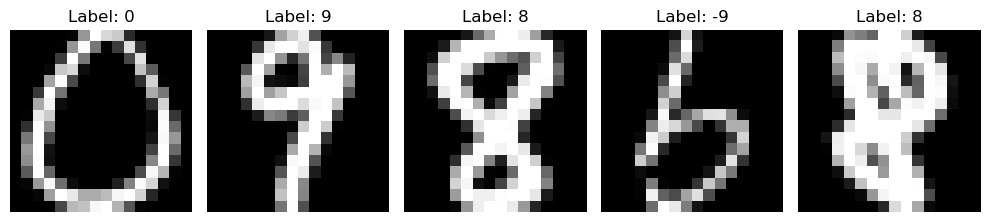

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def read_mnist_txt(file_path):
    images = []
    labels = []
    
    with open(file_path, 'r') as file:
        for line in file:
            # Skip empty lines
            if not line.strip():
                continue
                
            # Split the line into components
            parts = line.strip().split()
            
            # The first part is the image number in quotes (e.g., "1"), 
            # the second is the label, and the rest are pixel values
            image_num = parts[0].strip('"')
            label = int(parts[1])
            pixels = list(map(float, parts[2:]))
            
            # Convert pixel values to a 16x16 numpy array
            # The values are between -1 and 1, so we normalize to 0-1 for display
            pixel_array = np.array(pixels).reshape(16, 16)
            normalized_array = (pixel_array + 1) / 2  # Scale from [-1, 1] to [0, 1]
            
            images.append(normalized_array)
            labels.append(label)
    
    return images, labels

def display_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray', vmin=0, vmax=1)
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    images, labels = read_mnist_txt('Numbers.txt')
    
    # Display the first 5 imagesee
    display_images(images, labels, num_images=5)

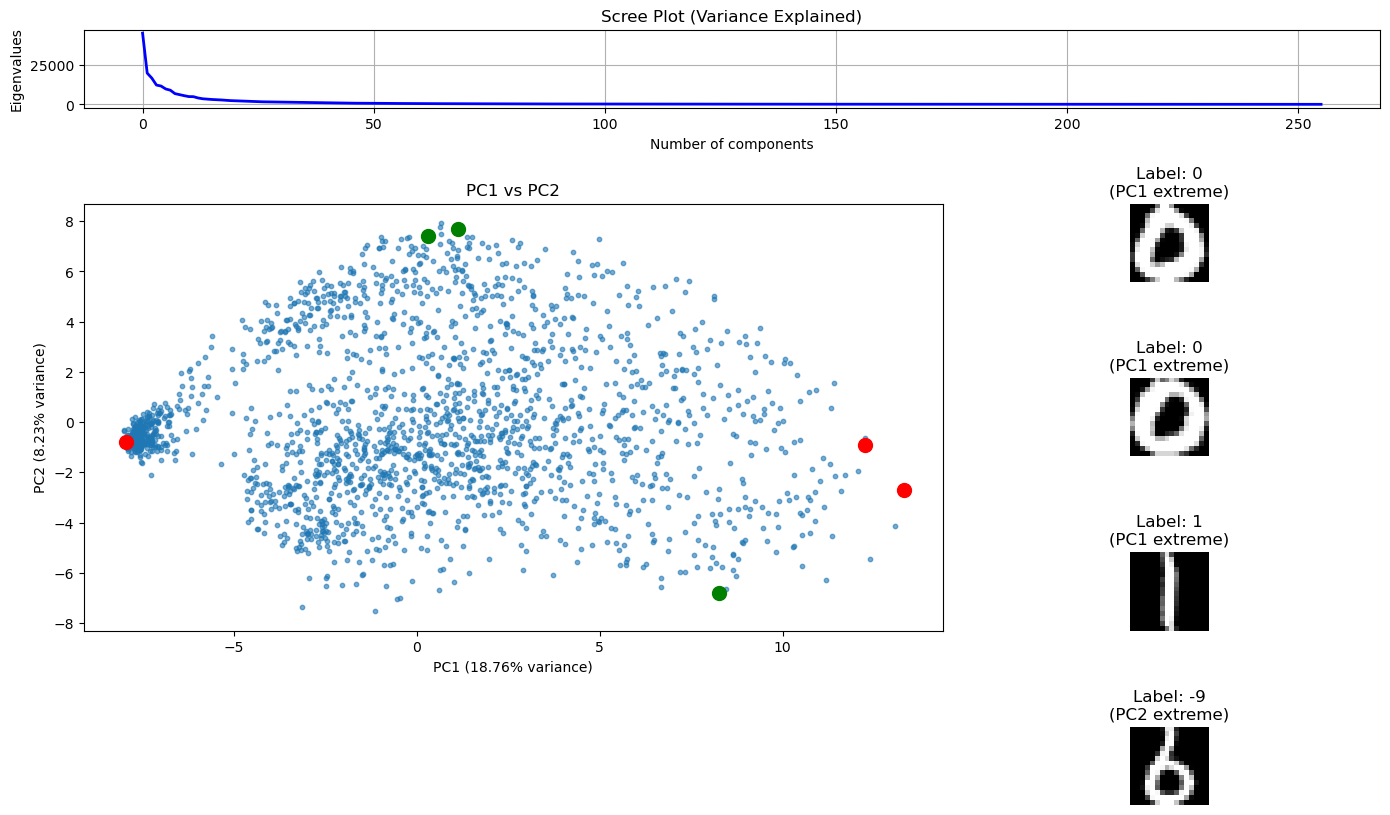

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from matplotlib.gridspec import GridSpec

def read_mnist_txt(file_path):
    images = []
    labels = []
    
    with open(file_path, 'r') as file:
        for line in file:
            if not line.strip():
                continue
            parts = line.strip().split()
            image_num = parts[0].strip('"')
            label = int(parts[1])
            pixels = list(map(float, parts[2:]))
            pixel_array = np.array(pixels).reshape(16, 16)
            images.append(pixel_array)
            labels.append(label)
    
    return np.array(images), np.array(labels)

def perform_svd(images):
    # Flatten the images (2000, 16, 16) -> (2000, 256)
    X = images.reshape(images.shape[0], -1)
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Perform SVD
    svd = TruncatedSVD(n_components=256)
    svd.fit(X_centered)
    
    return svd, X_centered

def plot_results(svd, X_centered, images, labels):
    # Create figure with appropriate grid layout
    plt.figure(figsize=(14, 10))
    gs = GridSpec(6, 3)  # Increase the number of rows to accommodate more images

    
    # Eigenvalue plot (top row, spans all columns)
    ax1 = plt.subplot(gs[0, :])
    ax1.plot(svd.singular_values_**2, 'b-', linewidth=2)
    ax1.set_xlabel('Number of components')
    ax1.set_ylabel('Eigenvalues')
    ax1.set_title('Scree Plot (Variance Explained)')
    ax1.grid(True)
    
    # PC1 vs PC2 plot (middle-left, spans rows 1-3)
    ax2 = plt.subplot(gs[1:4, 0:2])
    transformed = svd.transform(X_centered)
    ax2.scatter(transformed[:, 0], transformed[:, 1], s=10, alpha=0.6)
    ax2.set_xlabel('PC1 (%.2f%% variance)' % (100*svd.explained_variance_ratio_[0]))
    ax2.set_ylabel('PC2 (%.2f%% variance)' % (100*svd.explained_variance_ratio_[1]))
    ax2.set_title('PC1 vs PC2')
    
    # Find extreme points
    pc1_sorted = np.argsort(transformed[:, 0])
    pc2_sorted = np.argsort(transformed[:, 1])
    
    # Select samples from extremes (3 from PC1, 3 from PC2)
    au = np.concatenate([
        np.random.choice(pc1_sorted[-10:], 2),  # Top of PC1
        np.random.choice(pc1_sorted[:10], 1)    # Bottom of PC1
    ])
    
    bu = np.concatenate([
        np.random.choice(pc2_sorted[-10:], 2),  # Top of PC2
        np.random.choice(pc2_sorted[:10], 1)    # Bottom of PC2
    ])
    
    # Highlight selected points
    ax2.scatter(transformed[au, 0], transformed[au, 1], s=100, c='red', marker='o')
    ax2.scatter(transformed[bu, 0], transformed[bu, 1], s=100, c='green', marker='o')
    
    # Plot PC1 extreme digits (right column, rows 1-3)
    for i, idx in enumerate(au):
        ax = plt.subplot(gs[1 + i, 2])
        ax.imshow(images[idx], cmap='gray', vmin=-1, vmax=1)
        ax.set_title(f'Label: {labels[idx]}\n(PC1 extreme)')
        ax.axis('off')
    
    # Plot PC2 extreme digits (right column, rows 4-5)
    for i, idx in enumerate(bu[:1]):  # Ensure we don't exceed row index 4
        ax = plt.subplot(gs[4 + i, 2])
        ax.imshow(images[idx], cmap='gray', vmin=-1, vmax=1)
        ax.set_title(f'Label: {labels[idx]}\n(PC2 extreme)')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Load data
    images, labels = read_mnist_txt('Numbers.txt')
    
    # Perform SVD
    svd, X_centered = perform_svd(images)
    # Plot results
    plot_results(svd, X_centered, images, labels)

In [6]:
#cross validation